## Setup

In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from sklearn.decomposition import PCA
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("white")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Analysis

In [33]:
npzs = np.load('data/500_200-msgs.npz')
npzs = {x: npzs[x] for x in npzs.files}

msgs_proj = PCA(2).fit_transform(npzs['msgs'])

msgs = pd.DataFrame({
    'x': msgs_proj[:, 1],
    'y': msgs_proj[:, 0],
    'correct': np.all(((npzs_dict['preds'] > 1) == npzs['obs']), axis=1),
    'relation_dir': npzs['relation_dirs'],
    'relation': npzs['relations'],
    'relation_pair': pd.Series(list(zip(npzs['relation_dirs'], npzs['relations'])))
})

In [34]:
print("Exact accuracy:", msgs.correct.mean())

Exact accuracy: 0.997006734847


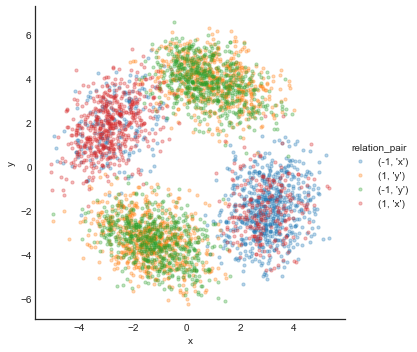

In [37]:
sns.lmplot('x', 'y', data=msgs, fit_reg=False, hue='relation_pair', legend_out=True,
           scatter_kws={'s': 10, 'alpha': 0.3})